In [1]:
import os
import pathlib
import urllib
import tarfile

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL,
                      housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path, filter='data')
    housing_tgz.close()
fetch_housing_data()

In [4]:
import pandas as pd
import numpy as np

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


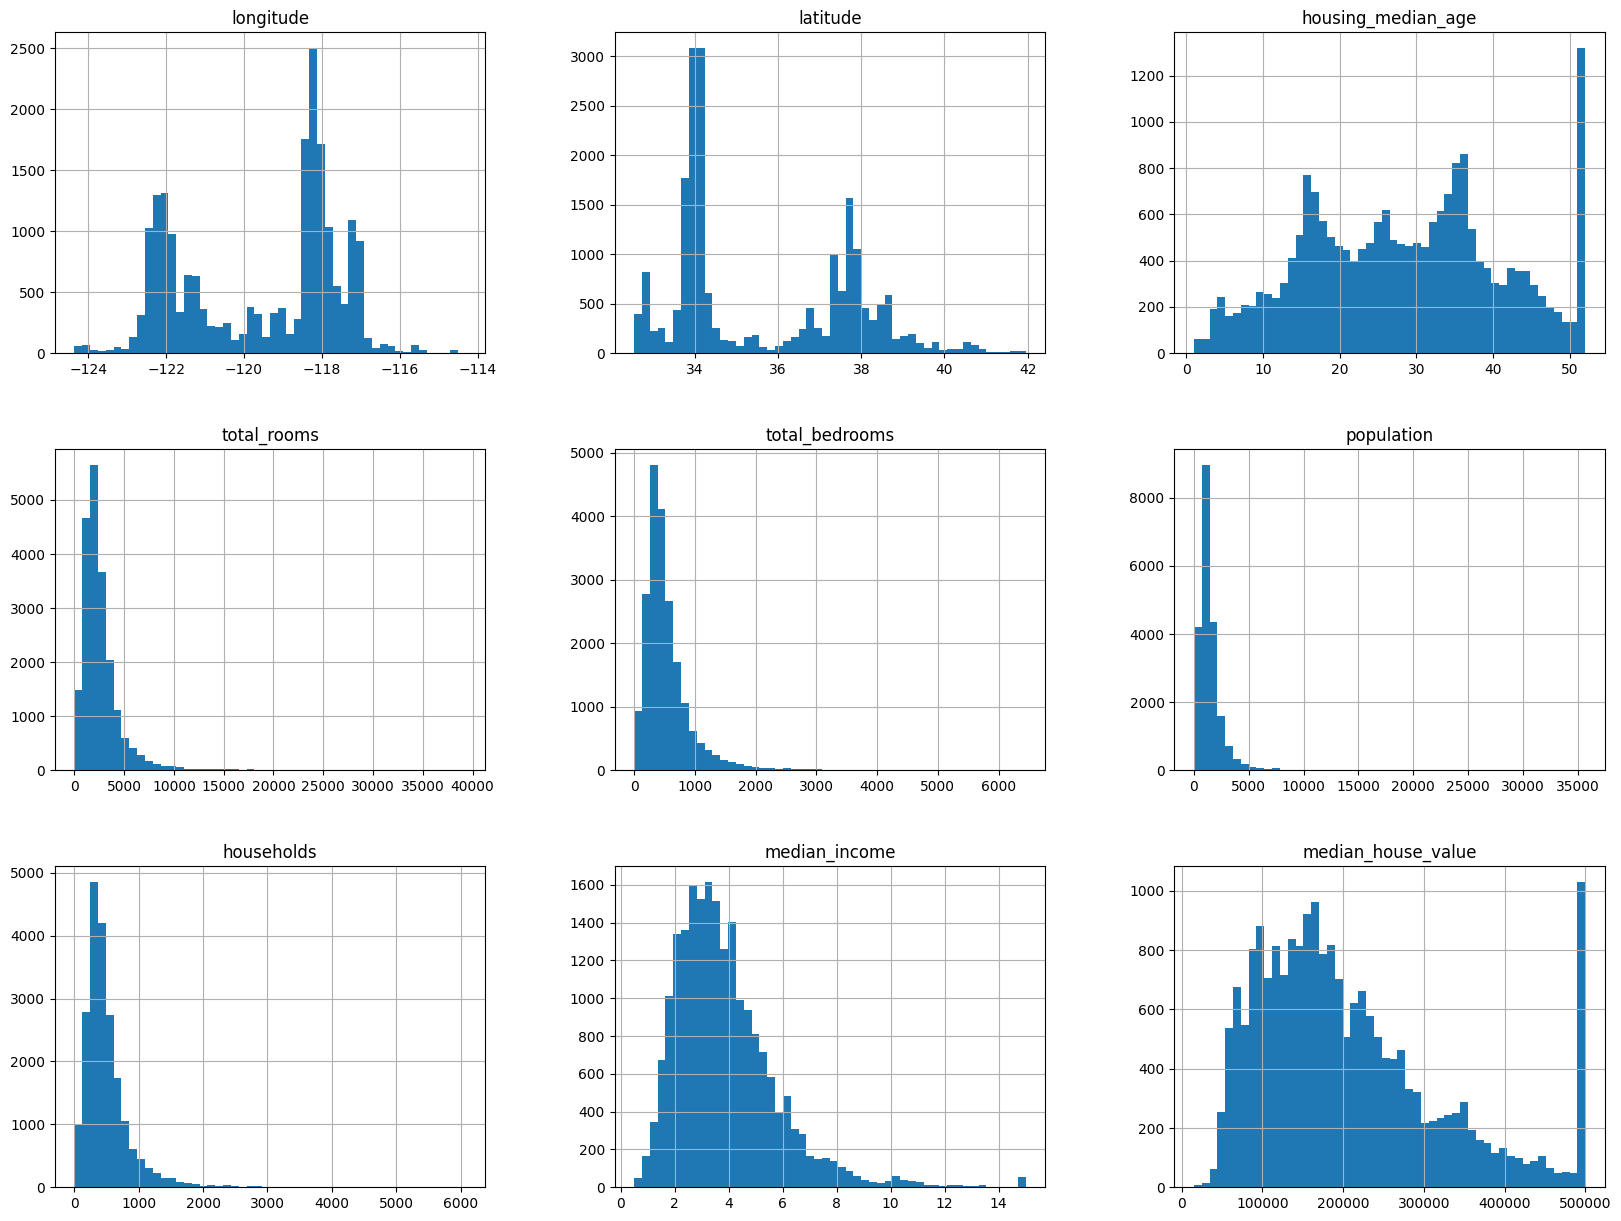

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(20,15))
plt.show()

In [11]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [14]:
housing["income_cate"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6., np.inf],
                               labels=[1,2,3,4,5])

<Axes: >

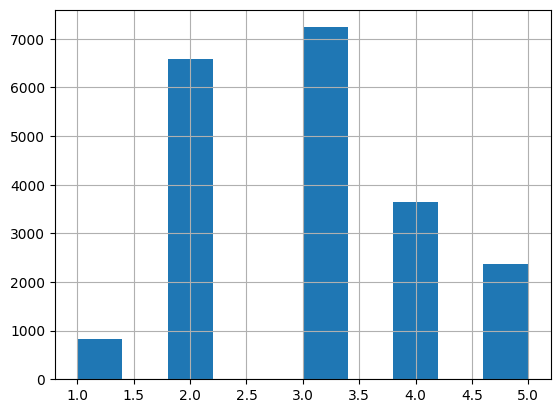

In [15]:
housing["income_cate"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing["income_cate"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cate"].value_counts()/len(strat_test_set)

income_cate
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cate", axis = 1, inplace = True)

In [19]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

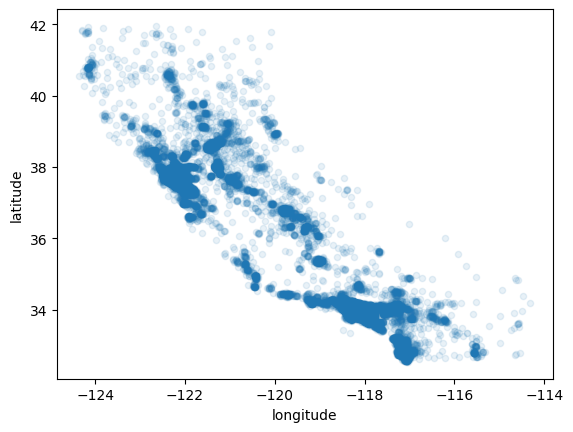

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

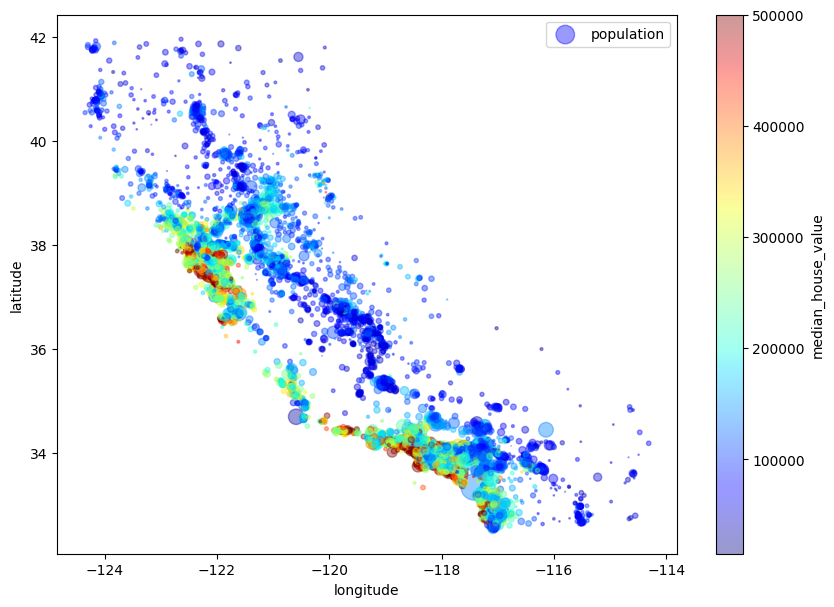

In [21]:
housing.plot(kind="scatter",x="longitude", y ="latitude",alpha = 0.4, s= housing["population"]/100,
            label="population",figsize =(10,7), c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar = True,
            )
plt.legend()


In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [23]:
corr_matrix = housing_num.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

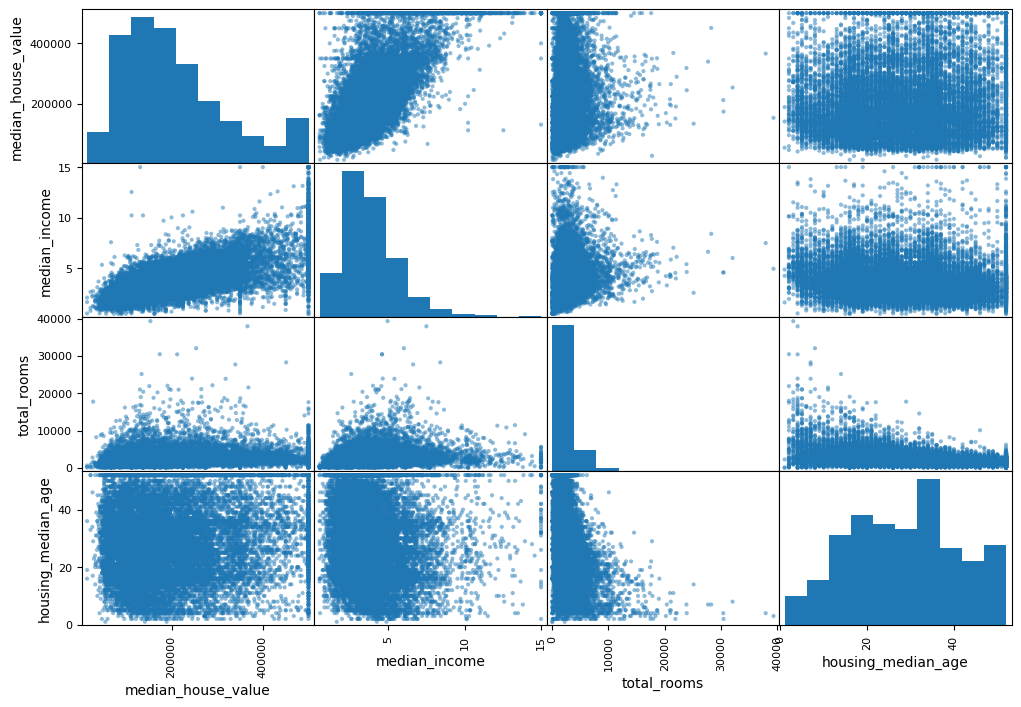

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes],figsize =(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

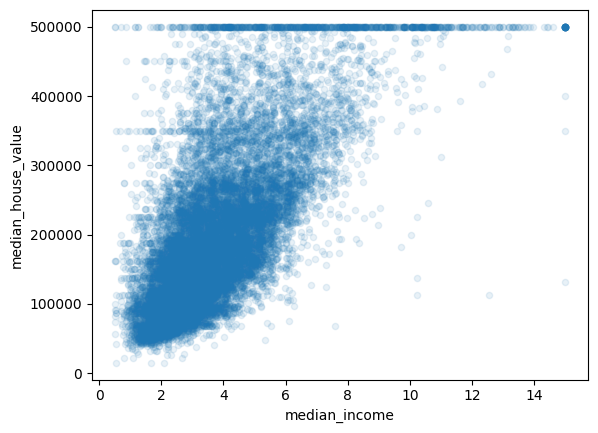

In [26]:
housing.plot(kind="scatter", x="median_income",
            y = "median_house_value", alpha=0.1)

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] =housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [28]:
housing1 = housing.drop("ocean_proximity",axis = 1)
corr_matrix = housing1.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [29]:
housing = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [30]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

C:\Users\Kamalov\AppData\Local\Temp\ipykernel_25828\3358363097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median,inplace=True)


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [32]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [33]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
X = imputer.transform(housing_num)

In [35]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,
                         index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [40]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [41]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X, y=None):
        return self
    def transform(self, X, y= None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_husehold = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household,population_per_husehold,bedrooms_per_room]

        else:
            return np.c_[X,rooms_per_household,population_per_husehold]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

<h1>Pipeline<h1>

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

<h3>Трансформатор для числовых столбцов и для категориальных столбцов(float)<h3>

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

<h1>Обучение модели <h1>

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**ТЕСТ**

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Прогнозы:", lin_reg.predict(some_data_prepared))

Прогнозы: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [47]:
print("Метки:", list(some_labels))

Метки: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


**RMSE**

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

<h2>DecisionTreeRegressor<h2>

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


**Оценка**

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

**K-fold cross-validation**

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         scoring = "neg_mean_squared_error", cv=10
)
tree_rmse_scores = np.sqrt(-scores)

**Проверка**

In [52]:
def display_scores(scores):
    print("Суммы оценок:", scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(tree_rmse_scores)

Суммы оценок: [72174.93617527 71130.68591412 70134.12689085 69764.02917585
 69642.4218277  77237.62946819 70911.22329466 71732.83191116
 68834.34747661 70129.4470892 ]
Среднее: 71169.16792236097
Стандартное отклонение: 2239.031332880555


In [53]:
lin_scores = cross_val_score(lin_reg,
                              housing_prepared,housing_labels,
                              scoring = "neg_mean_squared_error", cv=15)
lin_rmse_error = np.sqrt(-lin_scores)
display_scores(lin_rmse_error)

Суммы оценок: [71081.9756746  68036.07347521 64944.31832714 71473.74183541
 63382.68933308 69437.11911423 69004.5067058  67254.99430642
 72813.34251888 70912.90558685 71074.36028155 70531.3661142
 67790.77912161 67425.87422575 69749.63348044]
Среднее: 68994.24534007812
Стандартное отклонение: 2476.1856336906394


<h2>RandomForestRegressor<h2>

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(0.0)

In [56]:
forest_scores = cross_val_score(forest_reg,
                                 housing_prepared,housing_labels,
                                 scoring = "neg_mean_squared_error", cv= 10)
forest_rmse_error = np.sqrt(-forest_scores)
display_scores(forest_rmse_error)

Суммы оценок: [51472.20693974 49010.32585632 46788.61306871 52070.08830402
 47416.31986379 52333.8090252  52412.68433955 49917.68401995
 48870.17317547 53932.49035974]
Среднее: 50422.4394952476
Стандартное отклонение: 2250.5876312569835


<h1>Подбор гиперпараметров<h1>

<h3>Решетчатый поиск<h3>

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],
     'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(housing_prepared,housing_labels)


,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [59]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
cvres = grid_search.cv_results_

In [61]:
for mean_score, params in zip(cvres["mean_test_score"],
                             cvres["params"]):
    print(np.sqrt(-mean_score),params)

63228.145790398 {'max_features': 2, 'n_estimators': 3}
55490.02844503438 {'max_features': 2, 'n_estimators': 10}
52453.23018937046 {'max_features': 2, 'n_estimators': 30}
59892.79492799249 {'max_features': 4, 'n_estimators': 3}
52637.00723938236 {'max_features': 4, 'n_estimators': 10}
50642.69692809413 {'max_features': 4, 'n_estimators': 30}
59488.78584365681 {'max_features': 6, 'n_estimators': 3}
52027.72367011809 {'max_features': 6, 'n_estimators': 10}
49903.59749797313 {'max_features': 6, 'n_estimators': 30}
58098.11059496143 {'max_features': 8, 'n_estimators': 3}
51813.53602071723 {'max_features': 8, 'n_estimators': 10}
50172.620226681254 {'max_features': 8, 'n_estimators': 30}
62268.33535204603 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54183.47333552241 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60765.05825681141 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52387.30430596168 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

<h3>Рандомизированный поиск<h3>

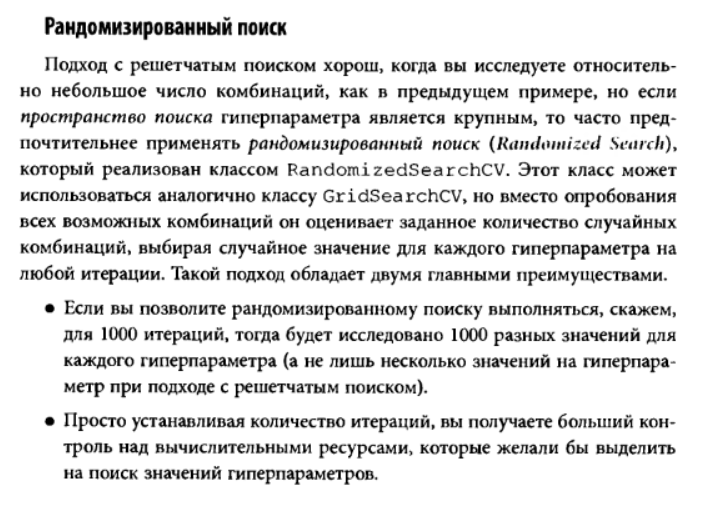

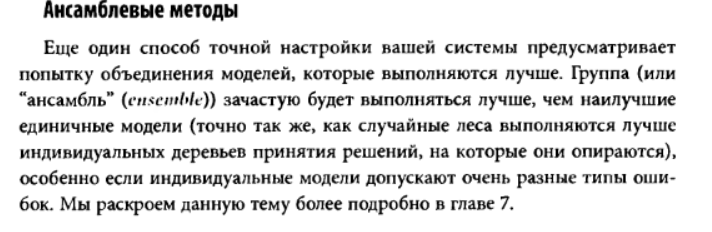

In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [63]:
feature_importances

array([8.58394509e-02, 7.55308475e-02, 4.16566671e-02, 1.78520111e-02,
       1.66768617e-02, 1.69485251e-02, 1.66567357e-02, 2.75829242e-01,
       6.40827106e-02, 1.06797006e-01, 9.88421392e-02, 1.22840621e-02,
       1.59659556e-01, 3.39337179e-05, 4.26945729e-03, 7.04079443e-03])

In [64]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold",
                "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse = True)

[(np.float64(0.2758292417495419), 'median_income'),
 (np.float64(0.15965955631254233), 'INLAND'),
 (np.float64(0.10679700553963392), 'pop_per_hhold'),
 (np.float64(0.09884213918578441), 'bedrooms_per_room'),
 (np.float64(0.08583945086857497), 'longitude'),
 (np.float64(0.07553084745701763), 'latitude'),
 (np.float64(0.06408271064816289), 'rooms_per_hhold'),
 (np.float64(0.04165666713707358), 'housing_median_age'),
 (np.float64(0.017852011067619536), 'total_rooms'),
 (np.float64(0.016948525110149087), 'population'),
 (np.float64(0.016676861651892076), 'total_bedrooms'),
 (np.float64(0.016656735737554197), 'households'),
 (np.float64(0.012284062097584139), '<1H OCEAN'),
 (np.float64(0.007040794425718606), 'NEAR OCEAN'),
 (np.float64(0.004269457293201241), 'NEAR BAY'),
 (np.float64(3.3933717949633414e-05), 'ISLAND')]

**Оценка системы с помощью испыт набора**

In [68]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(47130.00874231091)

**Доверительный интервал**

In [69]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors) -1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45188.32214332, 48994.80574482])